In [38]:
import pytesseract
from pytesseract import Output
from PIL import Image
import cv2 as cv
import matplotlib.pyplot as plt

In [8]:
pytesseract.pytesseract.tesseract_cmd = "C:/Program Files/Tesseract-OCR/tesseract.exe"

In [9]:
image = cv.imread("Images\OCR_english_text2.png", 0)
image_rgb = cv.imread("Images\OCR_english_text2.png")

In [17]:
img_blur = cv.medianBlur(image, 3)
_,img_thresh = cv.threshold(img_blur, 50, 255, cv.THRESH_BINARY)

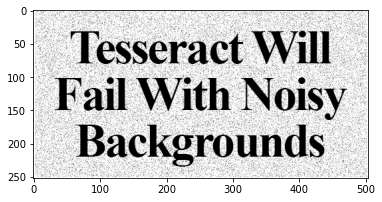

In [18]:
plt.imshow(image, cmap = 'gray')

In [19]:
img_text = pytesseract.image_to_string(img_thresh)


In [20]:
print(img_text)

Tesseract Will
Fail With Noisy
Backgrounds



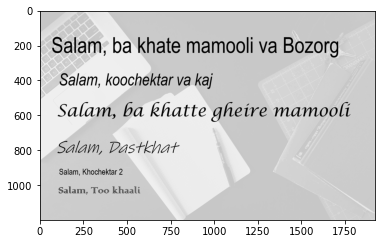

In [21]:
image = cv.imread("Images\OCR_english_text.png", 0)
image_rgb = cv.imread("Images\OCR_english_text.png")
plt.imshow(image, cmap = 'gray')

In [23]:
img_text = pytesseract.image_to_string(image)
print(img_text)

salam, ba khate mamooli va Bozorg
Salam, koochektar va kaj
Salam, ba khatte gheire mamoolt

Sala, Dastkhat

Salam, Khochektar 2

Salam, Too khaali



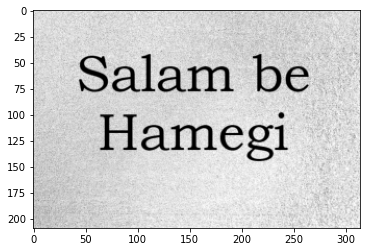

In [24]:
image = cv.imread("Images\OCR_english_text4.png", 0)
image_rgb = cv.imread("Images\OCR_english_text4.png")
plt.imshow(image, cmap = 'gray')

In [25]:
img_text = pytesseract.image_to_string(image)
print(img_text)

Salam be
Hamegi



In [27]:
text_boxes = pytesseract.image_to_boxes(image)
print(text_boxes)

S 44 130 72 165 0
a 76 130 103 155 0
l 104 131 117 167 0
a 120 130 147 155 0
m 149 131 193 155 0
b 211 130 238 167 0
e 243 130 265 155 0
H 64 75 100 109 0
a 104 74 131 99 0
m 133 75 177 99 0
e 158 64 191 111 0
g 180 74 202 99 0
i 205 64 245 111 0



In [28]:
text_boxes

'S 44 130 72 165 0\na 76 130 103 155 0\nl 104 131 117 167 0\na 120 130 147 155 0\nm 149 131 193 155 0\nb 211 130 238 167 0\ne 243 130 265 155 0\nH 64 75 100 109 0\na 104 74 131 99 0\nm 133 75 177 99 0\ne 158 64 191 111 0\ng 180 74 202 99 0\ni 205 64 245 111 0\n'

In [30]:
text_boxes_list = text_boxes.split('\n')

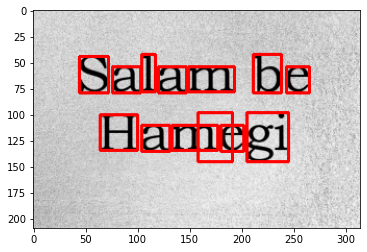

In [34]:
image_rgb = cv.imread("Images\OCR_english_text4.png")
w,h,c = image_rgb.shape

for box_coords in text_boxes_list:
    box_coords = box_coords.split(' ')
    if box_coords[0]:
        #print(box_coords)
        x1 = int(box_coords[1])
        y1 = int(box_coords[2])
        x2 = int(box_coords[3])
        y2 = int(box_coords[4])
        cv.rectangle(image_rgb, (x1,w-y1), (x2,w-y2), (255,0,0), 2)
plt.imshow(image_rgb)

In [39]:
img_data = pytesseract.image_to_data(image, output_type=Output.DICT)
img_data

{'level': [1, 2, 3, 4, 5, 5, 4, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 1, 2, 2],
 'word_num': [0, 0, 0, 0, 1, 2, 0, 1],
 'left': [0, 44, 44, 44, 44, 211, 64, 64],
 'top': [0, 42, 42, 42, 42, 42, 98, 98],
 'width': [314, 221, 221, 221, 149, 54, 181, 181],
 'height': [209, 103, 103, 37, 37, 37, 47, 47],
 'conf': ['-1', '-1', '-1', '-1', '96.318192', '96.608337', '-1', '91.675652'],
 'text': ['', '', '', '', 'Salam', 'be', '', 'Hamegi']}

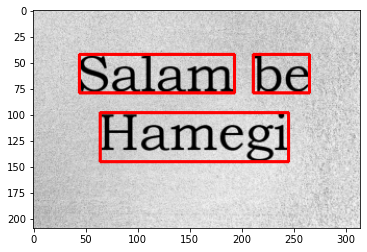

In [41]:
image_rgb = cv.imread("Images\OCR_english_text4.png")
w,h,c = image_rgb.shape

for index,text in enumerate(img_data['text']):
    if text:
        x1= int(img_data['left'][index])
        y1= int(img_data['top'][index])
        x2 = x1 + int(img_data['width'][index])
        y2 = y1 + int(img_data['height'][index])
        cv.rectangle(image_rgb, (x1, y1), (x2, y2), (255,0,0), 2)

plt.imshow(image_rgb)


In [42]:
pytesseract.get_languages()

['eng', 'fas', 'osd']

In [47]:
image = cv.imread("Images\OCR_persian_text3.png", 0)
image_rgb = cv.imread("Images\OCR_persian_text3.png")

In [48]:
text = pytesseract.image_to_string(image, lang='fas')
print(text)

لوتوس نازنین میترا قیقر کاپست رویا آبسان
ترافیک یاقوت زر یکان الهام هما امیر
نازلی کودک ایا بدر قفا نردوسی زیتون
کامران ست‌نوین مریم نرگس انتظار
خواسان ممتاز پویا دوات سیفا تسم تهران

بتشتهد مهر نسخ جدیه نماد شیرز

